Inverted Velocities (m/s): [486.59073784 513.93409934 536.37458807 429.14232687 615.04351247]


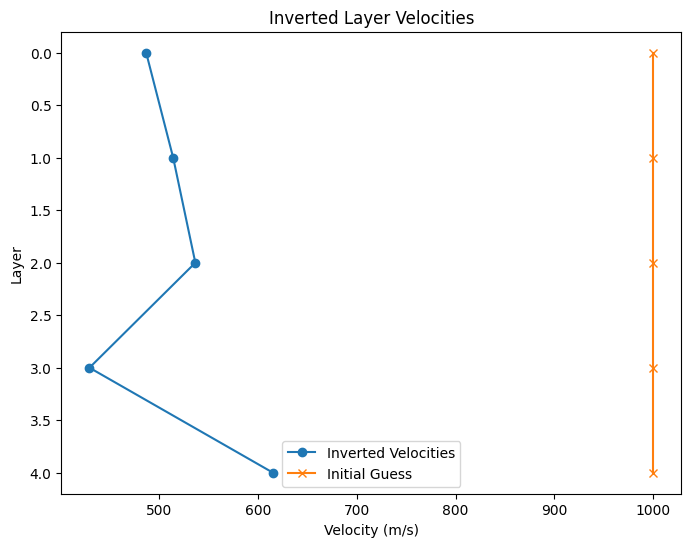

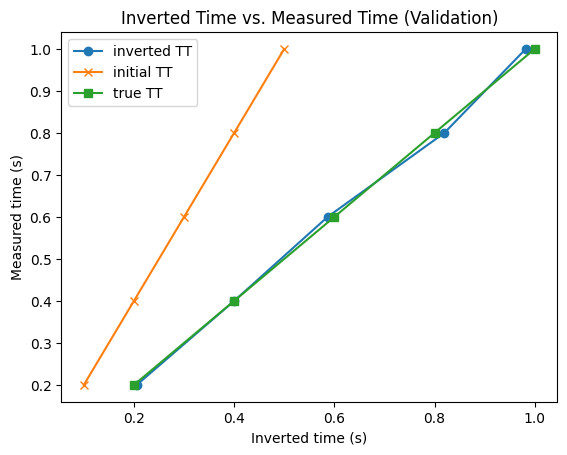

In [21]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# 假设的测量数据（单位：秒）
travel_times = np.array([0.2, 0.4, 0.6, 0.8, 1.0])

# 每层厚度（单位：米）
layer_thickness = 100

# 反演模型函数
def travel_time_model(velocities, layer_thickness):
    return layer_thickness / velocities

# 目标函数：计算测量数据与模型预测数据的差异
def objective_function(velocities, travel_times, layer_thickness):
    predicted_times = np.cumsum(travel_time_model(velocities, layer_thickness))
    return np.sum((travel_times - predicted_times)**2)

# 初始猜测的声速（单位：米/秒）
initial_guess = np.array([1000, 1000, 1000, 1000, 1000])

# 使用最小化方法反演声速
result = opt.minimize(objective_function, initial_guess, args=(travel_times, layer_thickness))

# 反演得到的声速
inverted_velocities = result.x

# 打印结果
print("Inverted Velocities (m/s):", inverted_velocities)

# 绘制反演结果
plt.figure(figsize=(8, 6))
plt.plot(inverted_velocities, range(len(inverted_velocities)), marker='o',label='Inverted Velocities')
plt.plot(initial_guess, range(len(initial_guess)), marker='x',label='Initial Guess')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Layer")
plt.title("Inverted Layer Velocities")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

# Forward modeling for validation
tt_inv=np.cumsum(travel_time_model(inverted_velocities,layer_thickness))
tt_ini=np.cumsum(travel_time_model(initial_guess,layer_thickness))

plt.figure
plt.plot(tt_inv,travel_times,marker='o',label='inverted TT')
plt.plot(tt_ini,travel_times,marker='x',label='initial TT')
plt.plot(travel_times,travel_times,marker='s',label='true TT')

plt.xlabel('Inverted time (s)')
plt.ylabel('Measured time (s)')
plt.title('Inverted Time vs. Measured Time (Validation)')
plt.legend()
plt.show()